In [25]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,ShuffleSplit, RandomizedSearchCV,cross_val_predict,cross_validate,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train_scaled = pd.read_csv('/home/kolade/repos/house-prediction/dataset/train_scaled.csv')
X_test_scaled  = pd.read_csv('/home/kolade/repos/house-prediction/dataset/test_scaled.csv')
X_train = pd.read_csv('/home/kolade/repos/house-prediction/dataset/train.csv')
X_test = pd.read_csv('/home/kolade/repos/house-prediction/dataset/test.csv')

In [4]:
X_train_scaled.shape, X_test_scaled.shape, X_train.shape, X_test.shape

((1241, 85), (219, 85), (1241, 85), (219, 85))

In [5]:
y_train_scaled, y_test_scaled = X_train_scaled[['SalePrice']], X_test_scaled[['SalePrice']]
y_train, y_test = X_train[['SalePrice']], X_test[['SalePrice']]

In [6]:
y_train_scaled.shape, y_test_scaled.shape, y_train.shape, y_test.shape

((1241, 1), (219, 1), (1241, 1), (219, 1))

In [7]:
X_train_scaled.drop(['Id','SalePrice'], axis =1, inplace=True)
X_train.drop(['Id','SalePrice'], axis =1, inplace=True)
X_test.drop(['Id','SalePrice'], axis =1, inplace=True)
X_test_scaled.drop(['Id','SalePrice'], axis =1, inplace=True)

# Theory testing 

**Two different engineered datasets were loaded, scaled and unscaled dataset. In this section a test is carried out to verify that both scaled and unscaled datasets have no effect on non-parametric models, this is done by fitting two separate tree models on one for each dataset. The metrics of both models are compared**.

In [8]:
# setting cross-validation split
cv = ShuffleSplit(n_splits=10,random_state=42)

In [9]:
# random forest for scaled dataset 
rf_scaled =RandomForestRegressor(random_state=42)

In [10]:
# random forest for unscaled datset 
rf = RandomForestRegressor(random_state=42)

In [11]:
# xgboost regressors for scaled  dataset
xgb_scaled = xgb.XGBRegressor(random_state=42)
# xgboost regressors for unscaled  dataset
xgb_rgr = xgb.XGBRegressor(random_state=42)

In [12]:
def display_scores(scores):
        """Computes mean and standard deviation of scores from cross-validation"""
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())

In [13]:
# test with random forest on scaled data
scores_scaled = cross_val_score(rf_scaled, X_train_scaled.values, y_train_scaled.values,cv= cv, scoring='neg_mean_squared_error')

/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

In [14]:
#rmse scores for random forest using scaled data
scaled_rmse =  np.sqrt(-scores_scaled)
display_scores(scaled_rmse)

Mean: 30307.00083972894
Standard deviation: 5093.564434687883


In [15]:
# test using cross validation on random forest with unscaled data
scores = cross_val_score(rf, X_train.values, y_train.values, cv= cv, scoring='neg_mean_squared_error')

/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kolade/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

In [16]:
#rmse scores for random forest using unscaled data
rmse =  np.sqrt(-scores)
display_scores(rmse)

Mean: 30288.529229635285
Standard deviation: 5040.698105633478


In [17]:
# test with xgboost on unscaled data
scores_xgb_scaled = cross_val_score(xgb_scaled, X_train_scaled.values, y_train_scaled.values,cv= cv,\
                                    scoring='neg_mean_squared_error', n_jobs=-1)

In [18]:
# rmse scores on scaled data
rmse =  np.sqrt(-scores_xgb_scaled)
display_scores(rmse)

Mean: 27389.66536506894
Standard deviation: 6358.702624181508


In [19]:
#test with xgboost on scaled data
scores_xgb = cross_val_score(xgb_rgr, X_train, y_train.values,cv= cv,\
                             scoring='neg_mean_squared_error', n_jobs=-1,)

In [20]:
#rmse scores with xgboost with unscaled data 
rmse =  np.sqrt(-scores_xgb)
display_scores(rmse)

Mean: 27338.45823755151
Standard deviation: 6390.529823652247


from the scores above:
- mean rmse random forest on scaled data = 30307.00083972894
- mean rmse random forest on unscaled data = 30288.529229635285
- mean rmse Xgboost on unscaled data = 27389.66536506894
- mean rmse Xgboost on scaled data = 27338.45823755151

These scores shows that our non-parametric models aren't affected by the scale of the data

# Feature Selection - Model-based

After training on both scaled and unscaled engineered dataset it is noted that, scaling the features does not really have an effect 
on the parametric model employed. Therefore Model selection and building is carried out on the unscaled dataset.

The dataset after featuring engineering has 83 features which would not make deployment easy, hence the need for feature selection

The Feature selection process is done with a model based approach. 

In [21]:
# Parameter distribution for random search
parameter_grid ={
    'max_depth' :[3,5,7,11],
    'learning_rate': scipy.stats.uniform(0.01, 0.1),
    'n_estimators' :[50,100,200,300],
    'colsample_bytree' :[0.7,0.8,0.9],
     'subsample':[0.7,0.8,0.9],
    'gamma' :[0,0.5,1],
}

In [253]:
#xgboost regression for feature selection
xgb_rgr = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

In [254]:
#random search cv with 100 iterations
rs_cv = RandomizedSearchCV(xgb_rgr,param_distributions=parameter_grid,scoring='neg_mean_squared_error', cv= cv,\
                      n_iter=100, verbose=5)

In [255]:
rs_cv.fit(X_train.values,y_train.values)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-1163855772.737, total=   0.6s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-1561407046.379, total=   0.6s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-779822163.998, total=   0.6s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-499740497.922, total=   0.6s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-425321334.978, total=   0.6s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-545331903.263, total=   0.6s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-721641352.502, total=   0.6s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.0917024992111335, max_depth=7, n_estimators=100, reg_alpha=1, 

[CV]  colsample_bytree=0.8, gamma=0.5, learning_rate=0.0800701223005151, max_depth=11, n_estimators=50, reg_alpha=1, subsample=0.9, score=-699809345.975, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.5, learning_rate=0.0800701223005151, max_depth=11, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=0.5, learning_rate=0.0800701223005151, max_depth=11, n_estimators=50, reg_alpha=1, subsample=0.9, score=-555003337.618, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.5, learning_rate=0.0800701223005151, max_depth=11, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=0.5, learning_rate=0.0800701223005151, max_depth=11, n_estimators=50, reg_alpha=1, subsample=0.9, score=-480129404.565, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.5, learning_rate=0.0800701223005151, max_depth=11, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=0.5, learning_rate=0.0800701223005151, max_depth=11, n_estimators=50,

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.08169812849446216, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8, score=-1164236971.376, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.08169812849446216, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.08169812849446216, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8, score=-1594894381.158, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.08169812849446216, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.08169812849446216, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8, score=-786166574.319, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.08169812849446216, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.08169812849446216, max_depth=5, n_estimators=50, reg_alpha=0

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.08933270039151193, max_depth=7, n_estimators=50, reg_alpha=0, subsample=0.9, score=-514703782.658, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.08933270039151193, max_depth=7, n_estimators=50, reg_alpha=0, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.08933270039151193, max_depth=7, n_estimators=50, reg_alpha=0, subsample=0.9, score=-652369905.626, total=   0.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.10474805928251231, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.10474805928251231, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8, score=-1087407540.815, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.10474805928251231, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.10474805928251231, max_depth=7, n_estimators=100, re

[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.04191218616140098, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8, score=-921340112.535, total=   0.8s
[CV] colsample_bytree=0.9, gamma=0, learning_rate=0.04191218616140098, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.04191218616140098, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8, score=-1274884015.305, total=   0.7s
[CV] colsample_bytree=0.9, gamma=0, learning_rate=0.04191218616140098, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.04191218616140098, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8, score=-494191959.912, total=   0.7s
[CV] colsample_bytree=0.9, gamma=0, learning_rate=0.04191218616140098, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.04191218616140098, max_depth=7, n_estimator

[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07093777183459458, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-409966428.260, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07093777183459458, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07093777183459458, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-526308055.040, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07093777183459458, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07093777183459458, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9, score=-832591454.638, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07093777183459458, max_depth=7, n_estimators=100, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07093777183459458, max_depth=7, n_estimators=100, reg_al

[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.02261619042233607, max_depth=5, n_estimators=300, reg_alpha=1, subsample=0.9, score=-732131815.520, total=   1.9s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.02261619042233607, max_depth=5, n_estimators=300, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.02261619042233607, max_depth=5, n_estimators=300, reg_alpha=1, subsample=0.9, score=-502520899.683, total=   1.6s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.02261619042233607, max_depth=5, n_estimators=300, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.02261619042233607, max_depth=5, n_estimators=300, reg_alpha=1, subsample=0.9, score=-419757942.771, total=   1.7s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.02261619042233607, max_depth=5, n_estimators=300, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.02261619042233607, max_depth=5, n_estimators=300, reg_al

[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.01078578790837992, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8, score=-1573180168.179, total=   1.0s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.01078578790837992, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.01078578790837992, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8, score=-1962588703.684, total=   1.1s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.01078578790837992, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.01078578790837992, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8, score=-790075445.044, total=   1.0s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.01078578790837992, max_depth=3, n_estimators=300, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.01078578790837992, max_depth=3, n_estimato

[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.029467523513360155, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.7, score=-462007485.767, total=   1.3s
[CV] colsample_bytree=0.7, gamma=0.5, learning_rate=0.029467523513360155, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.7 
[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.029467523513360155, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.7, score=-628318006.528, total=   1.5s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.08844245976539601, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.08844245976539601, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9, score=-1076721492.697, total=   3.9s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.08844245976539601, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.08844245976539601, max_depth=11, n_es

[CV]  colsample_bytree=0.9, gamma=0.5, learning_rate=0.015399780839825041, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9, score=-12333006903.343, total=   0.2s
[CV] colsample_bytree=0.9, gamma=0.5, learning_rate=0.015399780839825041, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=0.5, learning_rate=0.015399780839825041, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9, score=-10956135789.730, total=   0.2s
[CV] colsample_bytree=0.9, gamma=0.5, learning_rate=0.015399780839825041, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=0.5, learning_rate=0.015399780839825041, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9, score=-10066468776.767, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.041454871916460106, max_depth=5, n_estimators=100, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.041454871916460106, max_depth=5, n_esti

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.07693183215675899, max_depth=3, n_estimators=50, reg_alpha=0.5, subsample=0.7, score=-574962937.019, total=   0.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.07693183215675899, max_depth=3, n_estimators=50, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.07693183215675899, max_depth=3, n_estimators=50, reg_alpha=0.5, subsample=0.7, score=-779148588.162, total=   0.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.07693183215675899, max_depth=3, n_estimators=50, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.07693183215675899, max_depth=3, n_estimators=50, reg_alpha=0.5, subsample=0.7, score=-1292642460.176, total=   0.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.07693183215675899, max_depth=3, n_estimators=50, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.07693183215675899, max_depth=3, n_estimators=50, 

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.07755214854897095, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8, score=-766998678.371, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.07755214854897095, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.07755214854897095, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8, score=-577281892.450, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.07755214854897095, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.07755214854897095, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8, score=-453402188.769, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.07755214854897095, max_depth=5, n_estimators=50, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.07755214854897095, max_depth=5, n_estimators=50, reg_alpha=0, 

[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.049530539258913236, max_depth=3, n_estimators=100, reg_alpha=0.5, subsample=0.8, score=-1293998061.265, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0.5, learning_rate=0.049530539258913236, max_depth=3, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.049530539258913236, max_depth=3, n_estimators=100, reg_alpha=0.5, subsample=0.8, score=-1637500252.911, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0.5, learning_rate=0.049530539258913236, max_depth=3, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.049530539258913236, max_depth=3, n_estimators=100, reg_alpha=0.5, subsample=0.8, score=-936319221.104, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0.5, learning_rate=0.049530539258913236, max_depth=3, n_estimators=100, reg_alpha=0.5, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.049530539258913236, ma

[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.07580091926160216, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.7, score=-467837601.151, total=   1.6s
[CV] colsample_bytree=0.9, gamma=1, learning_rate=0.07580091926160216, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.7 
[CV]  colsample_bytree=0.9, gamma=1, learning_rate=0.07580091926160216, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.7, score=-626908954.636, total=   1.7s
[CV] colsample_bytree=0.7, gamma=0.5, learning_rate=0.05504929192453181, max_depth=11, n_estimators=100, reg_alpha=0, subsample=0.7 
[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.05504929192453181, max_depth=11, n_estimators=100, reg_alpha=0, subsample=0.7, score=-1071955237.175, total=   1.0s
[CV] colsample_bytree=0.7, gamma=0.5, learning_rate=0.05504929192453181, max_depth=11, n_estimators=100, reg_alpha=0, subsample=0.7 
[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.05504929192453181, max_depth=11, n_estimator

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.08547427711770138, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9, score=-848373931.982, total=   3.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.08547427711770138, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.08547427711770138, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9, score=-1130399721.642, total=   3.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.08547427711770138, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.08547427711770138, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9, score=-509227474.465, total=   3.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.08547427711770138, max_depth=11, n_estimators=300, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.08547427711770138, max_depth=11, n_es

[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.067401281338758, max_depth=5, n_estimators=100, reg_alpha=0.5, subsample=0.7, score=-408232522.119, total=   0.6s
[CV] colsample_bytree=0.9, gamma=0, learning_rate=0.067401281338758, max_depth=5, n_estimators=100, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.067401281338758, max_depth=5, n_estimators=100, reg_alpha=0.5, subsample=0.7, score=-508044047.881, total=   0.6s
[CV] colsample_bytree=0.9, gamma=0, learning_rate=0.067401281338758, max_depth=5, n_estimators=100, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.067401281338758, max_depth=5, n_estimators=100, reg_alpha=0.5, subsample=0.7, score=-821138665.801, total=   0.6s
[CV] colsample_bytree=0.9, gamma=0, learning_rate=0.067401281338758, max_depth=5, n_estimators=100, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.9, gamma=0, learning_rate=0.067401281338758, max_depth=5, n_estimators=100, reg_alph

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.10901181018067109, max_depth=11, n_estimators=300, reg_alpha=0, subsample=0.8, score=-740253479.667, total=   3.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.10901181018067109, max_depth=11, n_estimators=300, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.10901181018067109, max_depth=11, n_estimators=300, reg_alpha=0, subsample=0.8, score=-489447568.818, total=   3.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.10901181018067109, max_depth=11, n_estimators=300, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.10901181018067109, max_depth=11, n_estimators=300, reg_alpha=0, subsample=0.8, score=-463543047.467, total=   3.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.10901181018067109, max_depth=11, n_estimators=300, reg_alpha=0, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.10901181018067109, max_depth=11, n_estimators=300,

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.08722326054367144, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.9, score=-1146811543.477, total=   0.6s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.08722326054367144, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.08722326054367144, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.9, score=-1492253883.443, total=   0.7s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.08722326054367144, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.08722326054367144, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.9, score=-845140160.211, total=   0.6s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.08722326054367144, max_depth=7, n_estimators=100, reg_alpha=0.5, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.08722326054367144, max_depth=7, n_estimato

[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.07151502643346279, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.8, score=-487301495.260, total=   1.4s
[CV] colsample_bytree=0.7, gamma=0.5, learning_rate=0.07151502643346279, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.7, gamma=0.5, learning_rate=0.07151502643346279, max_depth=7, n_estimators=200, reg_alpha=1, subsample=0.8, score=-628706361.334, total=   1.3s
[CV] colsample_bytree=0.9, gamma=0.5, learning_rate=0.026550643275559553, max_depth=7, n_estimators=100, reg_alpha=0, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=0.5, learning_rate=0.026550643275559553, max_depth=7, n_estimators=100, reg_alpha=0, subsample=0.9, score=-1909106192.410, total=   0.8s
[CV] colsample_bytree=0.9, gamma=0.5, learning_rate=0.026550643275559553, max_depth=7, n_estimators=100, reg_alpha=0, subsample=0.9 
[CV]  colsample_bytree=0.9, gamma=0.5, learning_rate=0.026550643275559553, max_depth=7, n_est

[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.06153752424460887, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7, score=-727781788.782, total=   2.2s
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.06153752424460887, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.06153752424460887, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7, score=-1126730210.962, total=   2.3s
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.06153752424460887, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.06153752424460887, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7, score=-479446509.259, total=   2.3s
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.06153752424460887, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.06153752424460887, max_depth=11, n_es

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.10405158651191772, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7, score=-505548753.806, total=   2.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.10405158651191772, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.10405158651191772, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7, score=-559764162.839, total=   2.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.10405158651191772, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.10405158651191772, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7, score=-679217970.292, total=   3.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.10405158651191772, max_depth=11, n_estimators=200, reg_alpha=0.5, subsample=0.7 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.10405158651191772, max_depth=11, n_est

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.07426222599840004, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9, score=-620624817.308, total=   0.1s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.07426222599840004, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.07426222599840004, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9, score=-502840634.006, total=   0.1s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.07426222599840004, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.07426222599840004, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9, score=-549837117.574, total=   0.1s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.07426222599840004, max_depth=3, n_estimators=50, reg_alpha=1, subsample=0.9 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.07426222599840004, max_depth=3, n_estimators=50, reg_alpha=1, 

KeyboardInterrupt: 

In [121]:
# random search best estimator
rs_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07579569579042217,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
             n_estimators=200, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7, verbosity=1)

In [127]:
# Getting the scores to rank the features
importance_score = rs_cv.best_estimator_.feature_importances_

In [128]:
important_features = [(feature, score) for feature, score in zip(X_train.columns, importance_score)]

In [132]:
selected_features = dict(sorted(important_features, key= lambda x: x[1], reverse=True)[:22])

In [156]:
selected_features_series = pd.Series(selected_features)

In [ ]:
# saving selected features for deployment
selected_features.to_csv('/home/kolade/repos/house-prediction/dataset/selected_features.csv')

In [23]:
selected_features = pd.read_csv('/home/kolade/repos/house-prediction/dataset/selected_features.csv', header=None)

<BarContainer object of 22 artists>

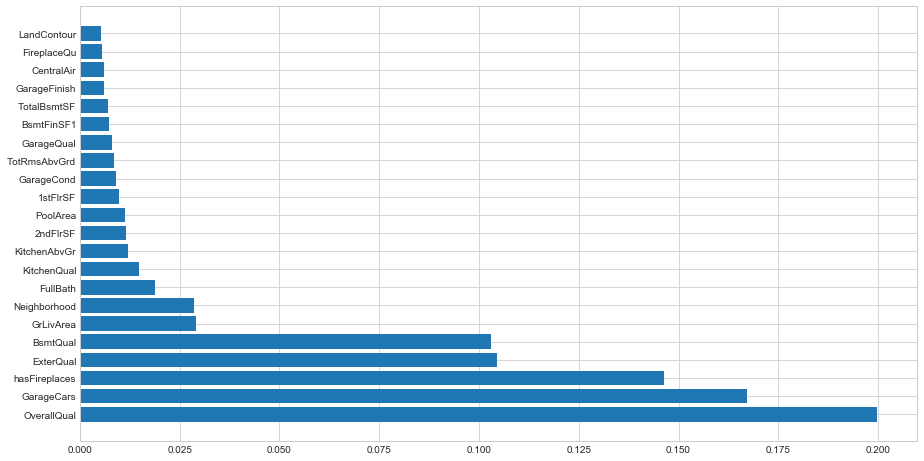

In [55]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,8))
plt.barh(selected_features[0], selected_features[1])


# Model Building 

In [22]:
# read selected features
selected_features_series =  pd.read_csv('/home/kolade/repos/house-prediction/dataset/selected_features.csv', header=None)[0]

In [62]:
 list_selected_feats=list(selected_features_series.values)

In [112]:
list_selected_feats.append('LotFrontage')

In [64]:
# pick selected features from the train_data 
X_train_selected = X_train[list_selected_feats]
X_test_selected = X_test[list_selected_feats]

For the hyper-parameter optimization carried out on the selected data, a thorough fine optimization was carried out from the coarse result gotten from the Randomsearch for feature selection using grid search cv . This was done on a step by step basis by optimizing complimentary  or similar pair of parameters per step, such as 
- n_estimators and max depth
- subsample and colsample_bytree etc

In [104]:
params = {
    'colsample_bytree': [0.95],
  'gamma':[0.01],
  'learning_rate': [0.1],
  'max_depth': [5],
  'min_child_weight':[3],
  'n_estimators': [100],
  'reg_alpha': [5],
  'reg_lambda': [0.1],
  'subsample': [0.85],
  'max_delta_step': [0.01,0.5,0,1,3,5]
}

In [66]:
xgboost  =  xgb.XGBRegressor(seed=42,objective='reg:squarederror')

In [67]:
grid_searchcv = GridSearchCV(xgboost,param_grid=params,scoring='neg_mean_squared_error', cv=cv,return_train_score=True, verbose=10 )

In [68]:
grid_searchcv.fit(X_train_selected.values, y_train.values)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-37701711955.402, test=-48151248525.666), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-38390428493.618, test=-42002387272.478), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-39552063869.796, test=-31631306633.952), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-38742177338.484, test=-38861973585.510), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s


[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-38662316813.455, test=-39574968352.967), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-38046051330.139, test=-45076986588.010), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s


[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-38635430793.250, test=-39815006741.358), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-37699956417.191, test=-48149310241.569), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0.5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1,

[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=0, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-124636227.676, test=-604287977.273), total=   0.2s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=1, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=1, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-37698165101.169, test=-48147332450.152), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=1, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=1, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85

[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-38372393454.877, test=-41984074325.978), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85, score=(train=-39533846425.899, test=-31614622200.698), total=   0.1s
[CV] colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=0.85 
[CV]  colsample_bytree=0.95, gamma=0.01, learning_rate=0.1, max_delta_step=5, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=5, reg_lambda=0.1, subsample=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.8s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_esti...
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.95], 'gamma': [0.01],
                         'learning_rate': [0.1],
                         'max_delta_step': [0.01, 0.5, 0, 1, 3, 5],
                         'max_depth': [5], 'min_child_weight': [3],
                         'n_estimators': [100], 'reg_alpha': [5],
                         're

In [70]:
from collections import defaultdict

In [71]:
#track gridsearch scores and parameters on test folds
test_score = defaultdict(dict)
cvres = grid_searchcv.cv_results_
test_score_params = []
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    test_score[np.sqrt(-mean_score)] = params
    test_score_params.append((np.sqrt(-mean_score), params))
sorted(test_score_params, key= lambda x: x[0])

[(26780.258767866893,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 0,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 0.85}),
 (202133.84702250437,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 5,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 0.85}),
 (202152.12071316512,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 3,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 0.85}),
 (202170.39467662058,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 1,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 

In [72]:
#track gridsearch scores and parameters on train folds
train_score = defaultdict(dict)
cvres = grid_searchcv.cv_results_
train_score_params = []
for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    train_score[np.sqrt(-mean_score)] = params
    train_score_params.append((np.sqrt(-mean_score), params))
sorted(train_score_params, key= lambda x:x[0])

[(10604.297092184579,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 0,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 0.85}),
 (196210.37570522804,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 5,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 0.85}),
 (196228.77970349658,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 3,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 0.85}),
 (196247.18395968497,
  {'colsample_bytree': 0.95,
   'gamma': 0.01,
   'learning_rate': 0.1,
   'max_delta_step': 1,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 100,
   'reg_alpha': 5,
   'reg_lambda': 0.1,
   'subsample': 

In [73]:
test_scores_array = np.array(list(test_score.keys()))
train_score_array = np.array(list(train_score.keys()))

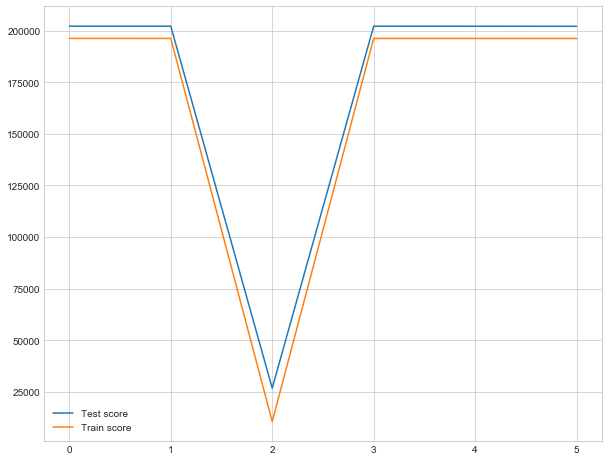

In [106]:
# plot mean scores from cross validation of both train and test
fig = plt.figure(figsize=(10,8))
x = list(range(6))
plt.plot(x,test_scores_array, label='Test score')
plt.plot(x,train_score_array ,label='Train score')
plt.legend()
plt.grid("on")


In [92]:
#assign dictionary of best params to a variable 
xgb_params =grid_searchcv.best_params_

In [109]:
#persist dictionary of params
np.save('/home/kolade/repos/house-prediction/persist/xgb_regression_params.npy',xgb_params)

In [93]:
xgboost_rgr =  xgb.XGBRegressor(seed=42,objective='reg:squarederror',**xgb_params )

In [94]:
xgboost_rgr.fit(X_train_selected.values, y_train.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=5, reg_lambda=0.1, scale_pos_weight=1,
             seed=42, silent=None, subsample=0.85, verbosity=1)

In [95]:
# predict on test_set
y_pred = xgboost_rgr.predict(X_test_selected.values)

In [96]:
# calculate RMSE on predictions for test_set
np.sqrt(mean_squared_error(y_test.values, y_pred))

27135.073718916115

In [97]:
# calculate R^2 score on precictions for test
r2_score(y_test.values, y_pred)

0.909305146155511

In [98]:
#predict on train set
y_pred_train = xgboost_rgr.predict(X_train_selected.values)

In [99]:
# calculate RMSE score on precictions for train_set

np.sqrt(mean_squared_error(y_train, y_pred_train))

11042.497655752457

In [100]:
# calculate R^2 score on precictions for train_set
r2_score(y_train.values, y_pred_train)

0.9796330818138674

The distribution of the errors is fairly normal which shows our model isn't bad

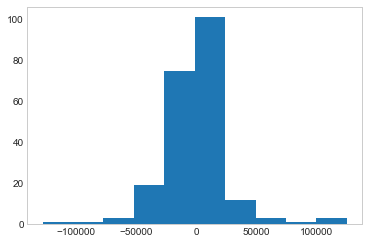

In [101]:
#plot the distribution of the errors
plt.hist(y_test.values.flatten()-y_pred)
plt.grid()

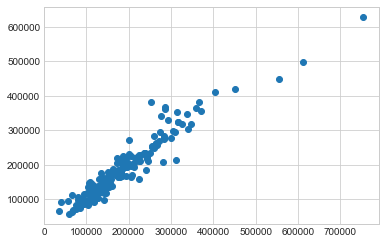

In [102]:
#plot the true target values against predicted ones
plt.scatter(y_test.values, y_pred)

The residuals are ploted to see the model is unable to capture patterns in the dataset, as it is seen, although not perfect the models are randomly distributed about the zero and no pattern emerges.

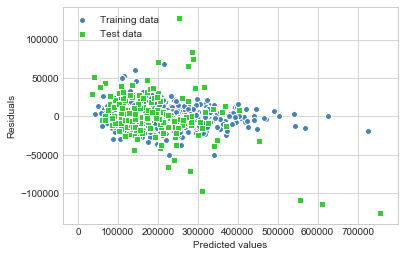

In [103]:
#plot the residuals
plt.scatter(y_pred_train, (y_pred_train - y_train.values.flatten()),c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test.values, (y_pred - y_test.values.flatten()),c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.show()